In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/butterfly-image-classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:10px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:pink; overflow:hidden"><b>🦋 Butterfly images classifications 🦋</b></div>

## 🦋 Butterfly Image Classification – Detailed Explanation


## 1. What is Butterfly Image Classification?

Butterfly image classification is a deep learning task where a model is trained to identify and classify butterfly species from images. The goal is to develop a model that can recognize different species based on their visual features such as wing color, patterns, and shapes.

## 2. Why is Butterfly Classification Important?
   
Biodiversity Conservation: Helps researchers track and monitor butterfly species, some of which are endangered.

Ecological Studies: Butterflies are bio-indicators, meaning their presence or absence can indicate environmental changes.

Citizen Science & Education: Useful for educational tools and citizen science projects where people can contribute to butterfly identification.

Automation in Taxonomy: Reduces the manual effort required to classify species by entomologists.

##  3. Dataset for Butterfly Classification
   
A dataset for butterfly classification typically contains:

Images of various butterfly species

Labels corresponding to species names

Metadata (e.g., location, time of capture, photographer details)

Example datasets:

Butterfly Image Dataset (from Kaggle)

iNaturalist Dataset

Custom-collected datasets from field studies

## 4. Preprocessing Steps
Before training a model, images undergo preprocessing:

Resizing: Standardize image dimensions (e.g., 224x224 pixels for CNN models).

Normalization: Scale pixel values (e.g., between 0 and 1) to improve training stability.

Data Augmentation: Apply transformations like rotation, flipping, and brightness adjustments to improve generalization.


## 5. Model Selection for Classification

Common deep learning models for butterfly classification:

CNNs (Convolutional Neural Networks): Extract spatial features from images.

Pretrained Models (Transfer Learning): Models like ResNet, VGG16, EfficientNet, and InceptionV3 can be fine-tuned for classification.

Vision Transformers (ViTs): Advanced architectures for image classification.

## 6. Training the Model

Loss Function: Cross-entropy loss is used for multi-class classification.

Optimizer: Adam, SGD, or RMSprop optimizes weight updates.

Epochs & Batch Size: Typically trained for 10–50 epochs with batch sizes like 32 or 64.

## 7. Model Evaluation Metrics

To measure performance, we use:

Accuracy: Percentage of correctly classified images.

Precision, Recall, and F1-score: Measures class-specific performance.

Confusion Matrix: Helps visualize misclassification patterns

## 8. Future Enhancements
   
Multi-label classification: Some species have similar traits, requiring more detailed identification.

Explainability: Use Grad-CAM to highlight which parts of the image influenced classification.

Self-supervised learning: Leverage unlabeled data to improve model performance.

**9.Result fot ResNet-50**

Here are some observations:

    Strong Performance Improvement
        The training accuracy increased steadily from 38.76% to 92.50% over 10 epochs.
        The validation accuracy started at 77.08% and peaked at 92.54% (Epoch 7).

    Overfitting Considerations
        The validation loss reached its lowest at Epoch 6 (0.2547), while validation accuracy peaked at Epoch 7.
        After that, the validation loss increased slightly, suggesting some overfitting.

**10.Result fot EfficientNetB0**

Performance Highlights:

    Training Accuracy: Improved from 26.27% → 90.17% in 10 epochs.
    Validation Accuracy: Reached 93.38% at the last epoch, which is higher than the previous run.
    Validation Loss: Dropped consistently to 0.2408, showing better generalization.

📉 Improvements Over the Last Run:

    Better Initial Convergence
        The first epoch had lower accuracy (26.27% vs. 38.76%) but caught up quickly in later epochs.
        This suggests the model started with more uncertainty but learned more effectively.

    Stronger Generalization
        Validation accuracy kept increasing till the last epoch (93.38%).
        Validation loss improved more consistently compared to the previous run.


**11. Result For VGGNet-16**

    Performance Summary

    Training Accuracy: Improved from 19.39% → 81.69% (slower compared to previous runs).
    Validation Accuracy: Reached 87.00%, which is lower than your best model (93.38%).
    Validation Loss: Dropped to 0.4842 (Epoch 8) but slightly increased afterward, indicating overfitting.

🔎 Key Observations & Issues

    Slower Convergence at the Start
        First epoch accuracy (19.39%) is lower than before, which means the model struggled more in early training.
        Could be due to suboptimal initialization, learning rate, or batch size.

    Validation Loss Inconsistency
        Loss increased after Epoch 8, suggesting overfitting.
        Validation accuracy stagnated from Epoch 7 onwards.

    Underperformance Compared to Previous Runs
        In the last run, accuracy reached 90.17%, and validation accuracy hit 93.38%.
        Here, the final validation accuracy is only 87.00%, meaning the model is underfitting.

****

****

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b>Import Libraries </b></div>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=r"Your `PyDataset` class should call `super().__init__\(\*\*kwargs\)`")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b>Import Dataset </b></div>

In [4]:
df = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")

In [5]:
df.head()

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [6]:
df.tail()

,filename,label
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT
6498,Image_6499.jpg,ATALA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB


In [8]:
df.describe

<bound method NDFrame.describe of             filename                     label
0        Image_1.jpg          SOUTHERN DOGFACE
1        Image_2.jpg                    ADONIS
2        Image_3.jpg            BROWN SIPROETA
3        Image_4.jpg                   MONARCH
4        Image_5.jpg  GREEN CELLED CATTLEHEART
...              ...                       ...
6494  Image_6495.jpg          MANGROVE SKIPPER
6495  Image_6496.jpg            MOURNING CLOAK
6496  Image_6497.jpg                   APPOLLO
6497  Image_6498.jpg           ELBOWED PIERROT
6498  Image_6499.jpg                     ATALA

[6499 rows x 2 columns]>

In [9]:
df.isnull().sum()

filename    0
label       0
dtype: int64

In [10]:
df.columns

Index(['filename', 'label'], dtype='object')

In [12]:
# Count classes and sort them
class_counts = df['label'].value_counts().sort_values(ascending=True)

# Define color gradient
colors = sns.color_palette("viridis", len(class_counts))

# Create figure
plt.figure(figsize=(12, 10))
bars = plt.barh(class_counts.index, class_counts.values, color=colors, edgecolor='black')

# Add annotations
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', ha='left', va='center', fontsize=12, fontweight='bold')

# Style customizations
plt.title('Distribution of Butterfly Classes 🦋', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Number of Images', fontsize=14, color='darkgreen')
plt.ylabel('Butterfly Classes', fontsize=14, color='darkred')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().set_facecolor("#f5f5f5")  # Light gray background

# Show plot
plt.tight_layout()
plt.show()


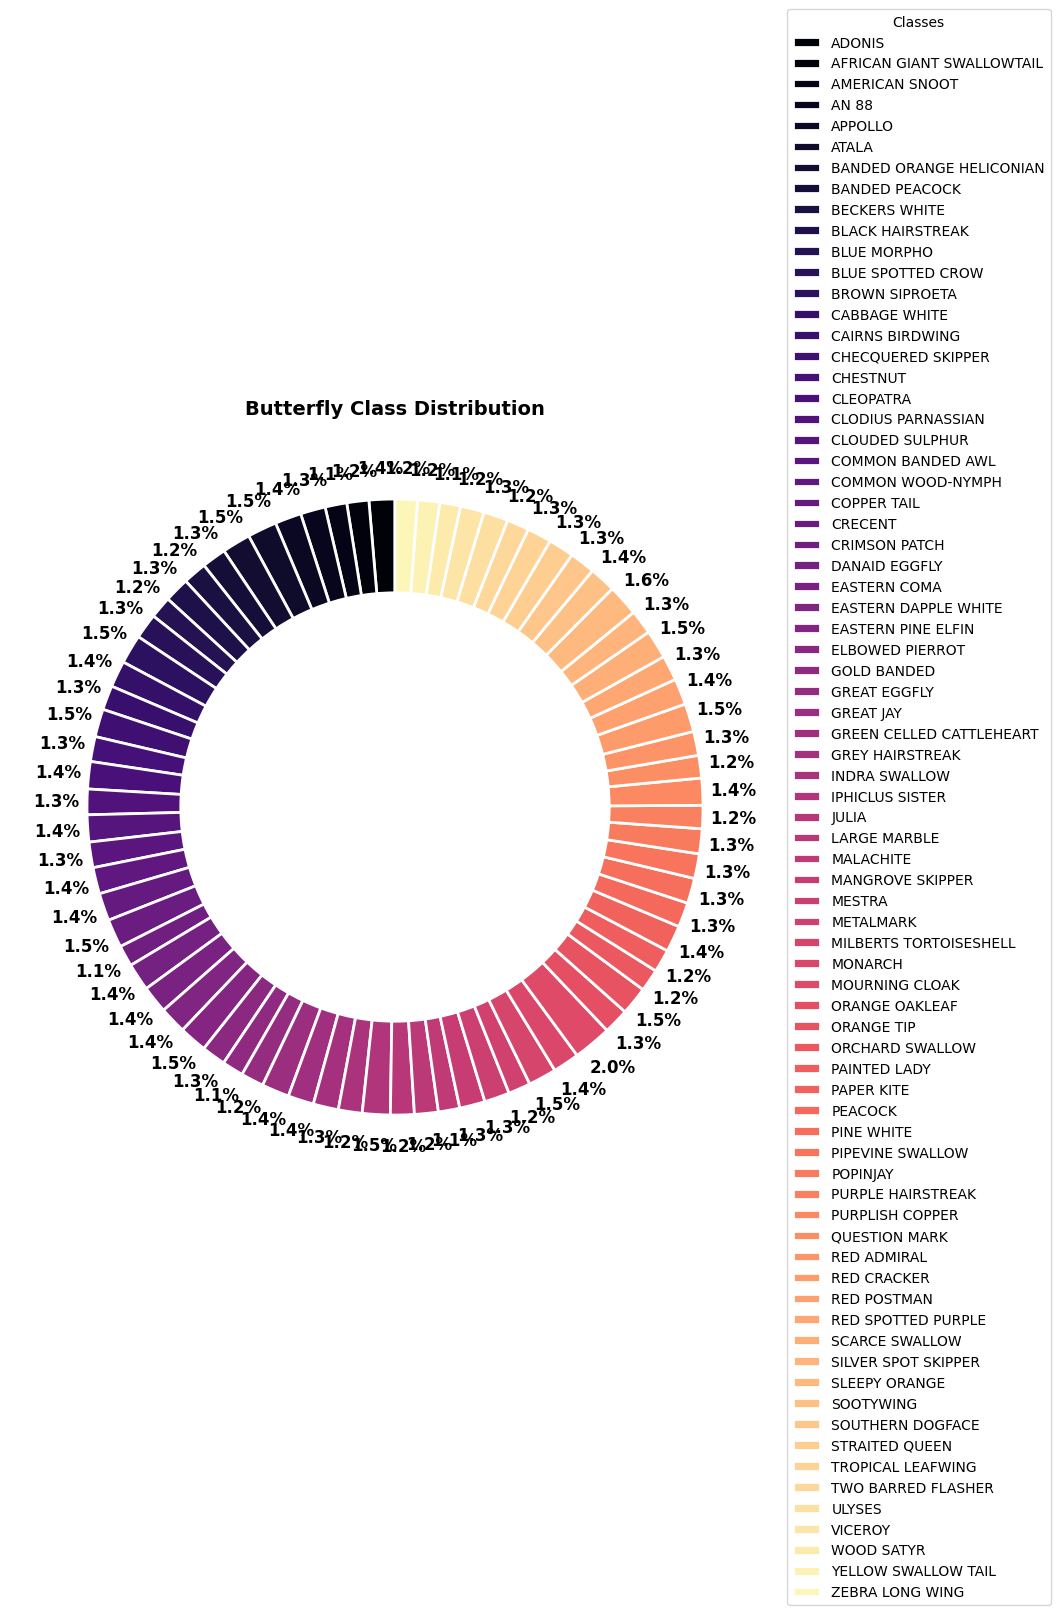

In [13]:
class_counts = df['label'].value_counts().sort_index()
colors = sns.color_palette("magma", len(class_counts))
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    class_counts.values, 
    labels=None, 
    autopct='',  # Hide default percentages
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
for i, (p, label) in enumerate(zip(wedges, class_counts.index)):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1  # Angle for text placement
    x = 1.1 * p.r * np.cos(np.radians(ang))
    y = 1.1 * p.r * np.sin(np.radians(ang))
    plt.text(x, y, f"{class_counts.values[i] / class_counts.sum() * 100:.1f}%", 
             ha="center", va="center", fontsize=12, fontweight="bold", color="black")
plt.title('Butterfly Class Distribution', fontsize=14, fontweight="bold")
plt.legend(class_counts.index, title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:skyblue; overflow:hidden"><b> Splitting Dataset </b></div>

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:90%; font-family:Pacifico; background-color:black; overflow:hidden"><b> Building the Model</b></div>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_baseline_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(75, activation='softmax')  # 75-class classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

baseline_model = build_baseline_cnn()
baseline_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 75)                  │           9,675 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,178,635 (42.64 MB)

 Trainable params: 11,178,635 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

def build_vgg16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(75, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

vgg16_model = build_vgg16()
vgg16_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 75)                  │          19,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,865,291 (56.71 MB)

 Trainable params: 150,603 (588.29 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [3]:
from tensorflow.keras.applications import ResNet50

def build_resnet50():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(75, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

resnet50_model = build_resnet50()
resnet50_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 75)                  │          19,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,131,531 (92.05 MB)

 Trainable params: 543,819 (2.07 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [4]:
from tensorflow.keras.applications import EfficientNetB0

def build_efficientnet():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(75, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

efficientnet_model = build_efficientnet()
efficientnet_model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 75)                  │          19,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,396,782 (16.77 MB)

 Trainable params: 347,211 (1.32 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 548ms/step - accuracy: 0.0413 - loss: 4.3858 - val_accuracy: 0.3323 - val_loss: 3.3575 - learning_rate: 1.0000e-04
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 348ms/step - accuracy: 0.2882 - loss: 3.1777 - val_accuracy: 0.5562 - val_loss: 2.4004 - learning_rate: 1.0000e-04
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 344ms/step - accuracy: 0.4480 - loss: 2.3792 - val_accuracy: 0.6592 - val_loss: 1.7963 - learning_rate: 1.0000e-04
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 342ms/step - accuracy: 0.5480 - loss: 1.8348 - val_accuracy: 0.7138 - val_loss: 1.4416 - learning_rate: 1.0000e-04
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 343ms/step - accuracy: 0.6258 - loss: 1.4952 - val_accuracy: 0.7269 - val_loss: 1.2349 - learning_rate: 1.0000e-04
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 348ms/step - accuracy: 0.6611 - loss: 1.3399 - val_accuracy: 0.7508 - val_loss: 1.1050 - learning_rate: 1.0000e-04
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 345ms/step -

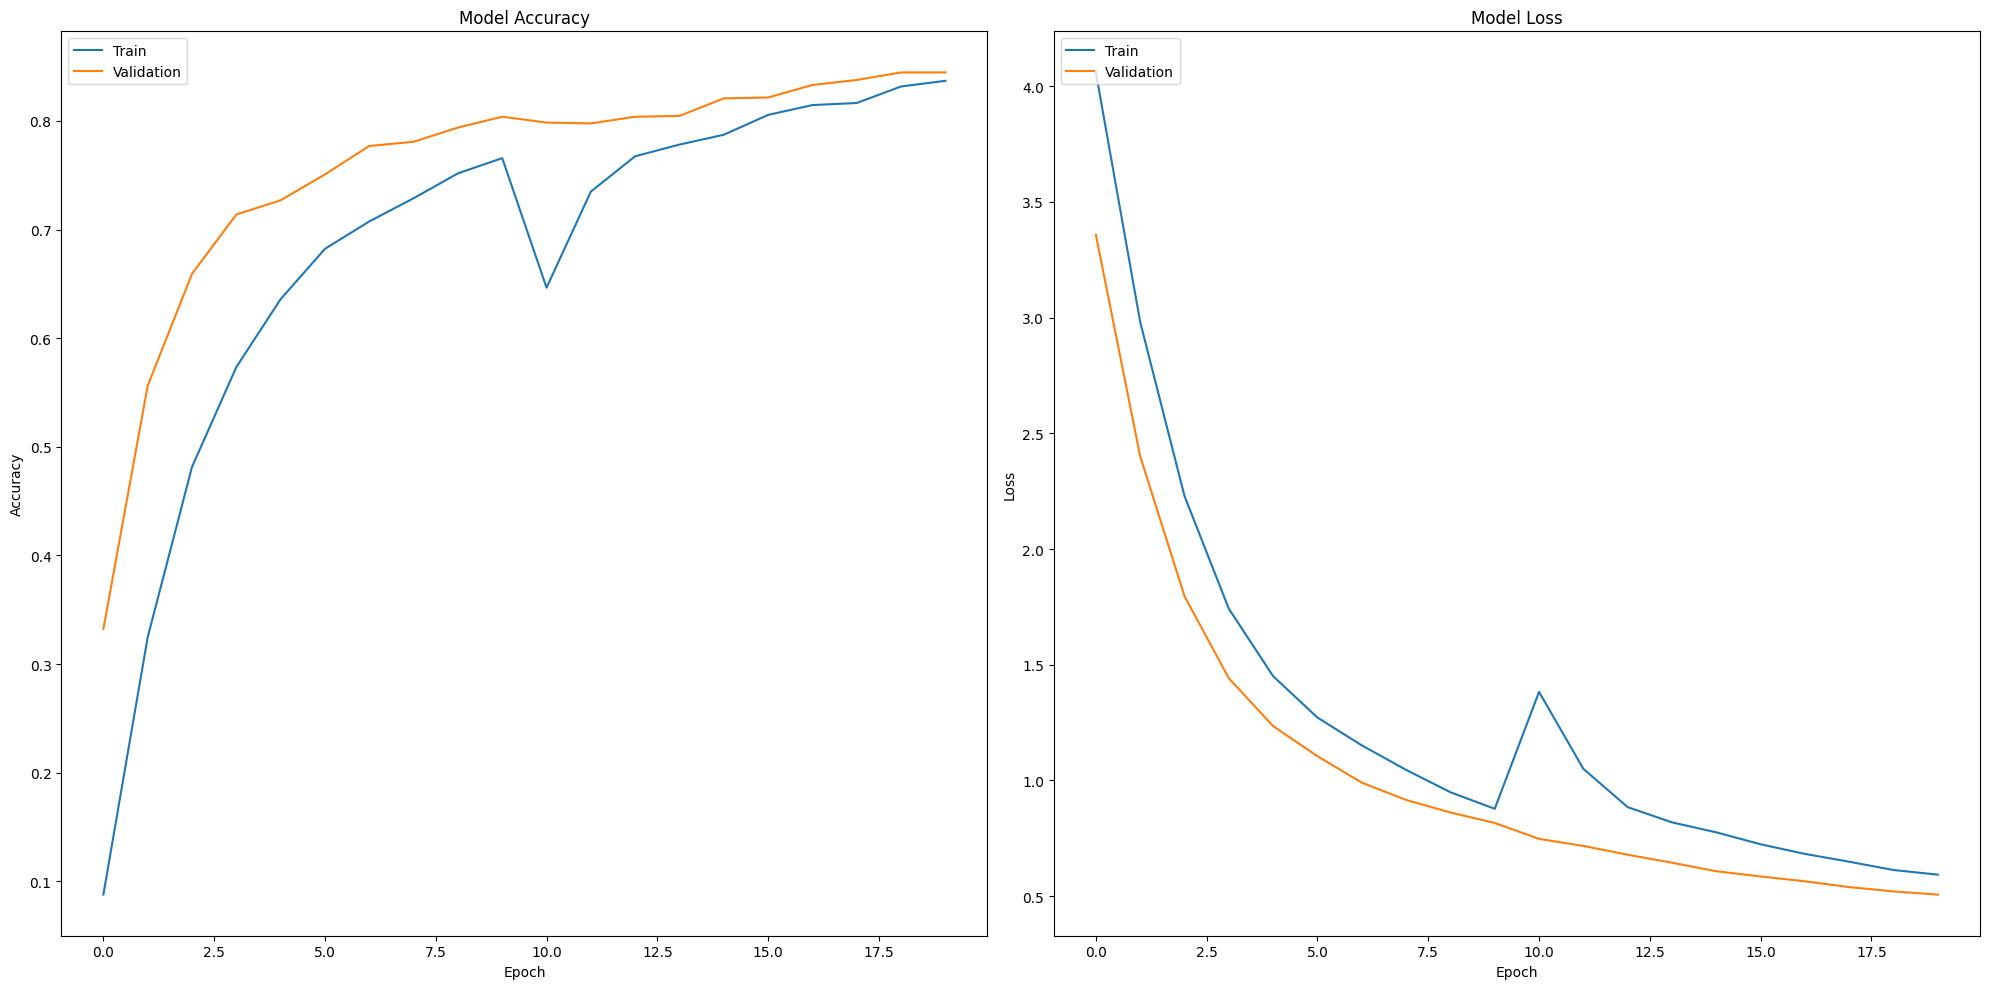

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Pretrained MobileNetV2 Model (Without Top Layers)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze Base Model (First Training Phase)
base_model.trainable = False

# Create Model with Custom Fully Connected Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(75, activation='softmax')  # Output Layer (Number of Classes)
])

# Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define class weights for imbalance handling
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Modify based on dataset imbalance

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Train the model (First Phase: Frozen Base Model)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Fine-Tune Model by Unfreezing Last 20 Layers of MobileNetV2
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Keep earlier layers frozen
    layer.trainable = False

# Recompile for Fine-Tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-Tune the Model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Fine-tuning phase
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Handle Test Data (No Labels)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=image_dir,
    x_col='filename',
    y_col=None,  # No labels available
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No class labels
    shuffle=False
)

# Predict on test images
predictions = model.predict(test_generator)

# Convert softmax probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Create DataFrame with filenames and predicted labels
df_test['predicted_label'] = predicted_classes

# Save predictions to CSV (Optional)
df_test[['filename', 'predicted_label']].to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

# Plot Accuracy and Loss
plt.figure(figsize=(20, 10))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_finetune.history['loss'])
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 127s 637ms/step - accuracy: 0.0108 - loss: 4.3468 - val_accuracy: 0.0092 - val_loss: 4.3187 - learning_rate: 1.0000e-04
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 342ms/step - accuracy: 0.0146 - loss: 4.3408 - val_accuracy: 0.0269 - val_loss: 4.3168 - learning_rate: 1.0000e-04
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 341ms/step - accuracy: 0.0204 - loss: 4.3409 - val_accuracy: 0.0269 - val_loss: 4.3180 - learning_rate: 1.0000e-04
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 341ms/step - accuracy: 0.0156 - loss: 4.3332 - val_accuracy: 0.0269 - val_loss: 4.3197 - learning_rate: 1.0000e-04
Epoch 5/30
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.0176 - loss: 4.3384
Epoch 5: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 337ms/step - accuracy: 0.0176 - loss: 4.3384 - val_accuracy: 0.0269 - val_loss: 4.3198 - learning_rate: 1.0000e-04
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 341ms/step - accur

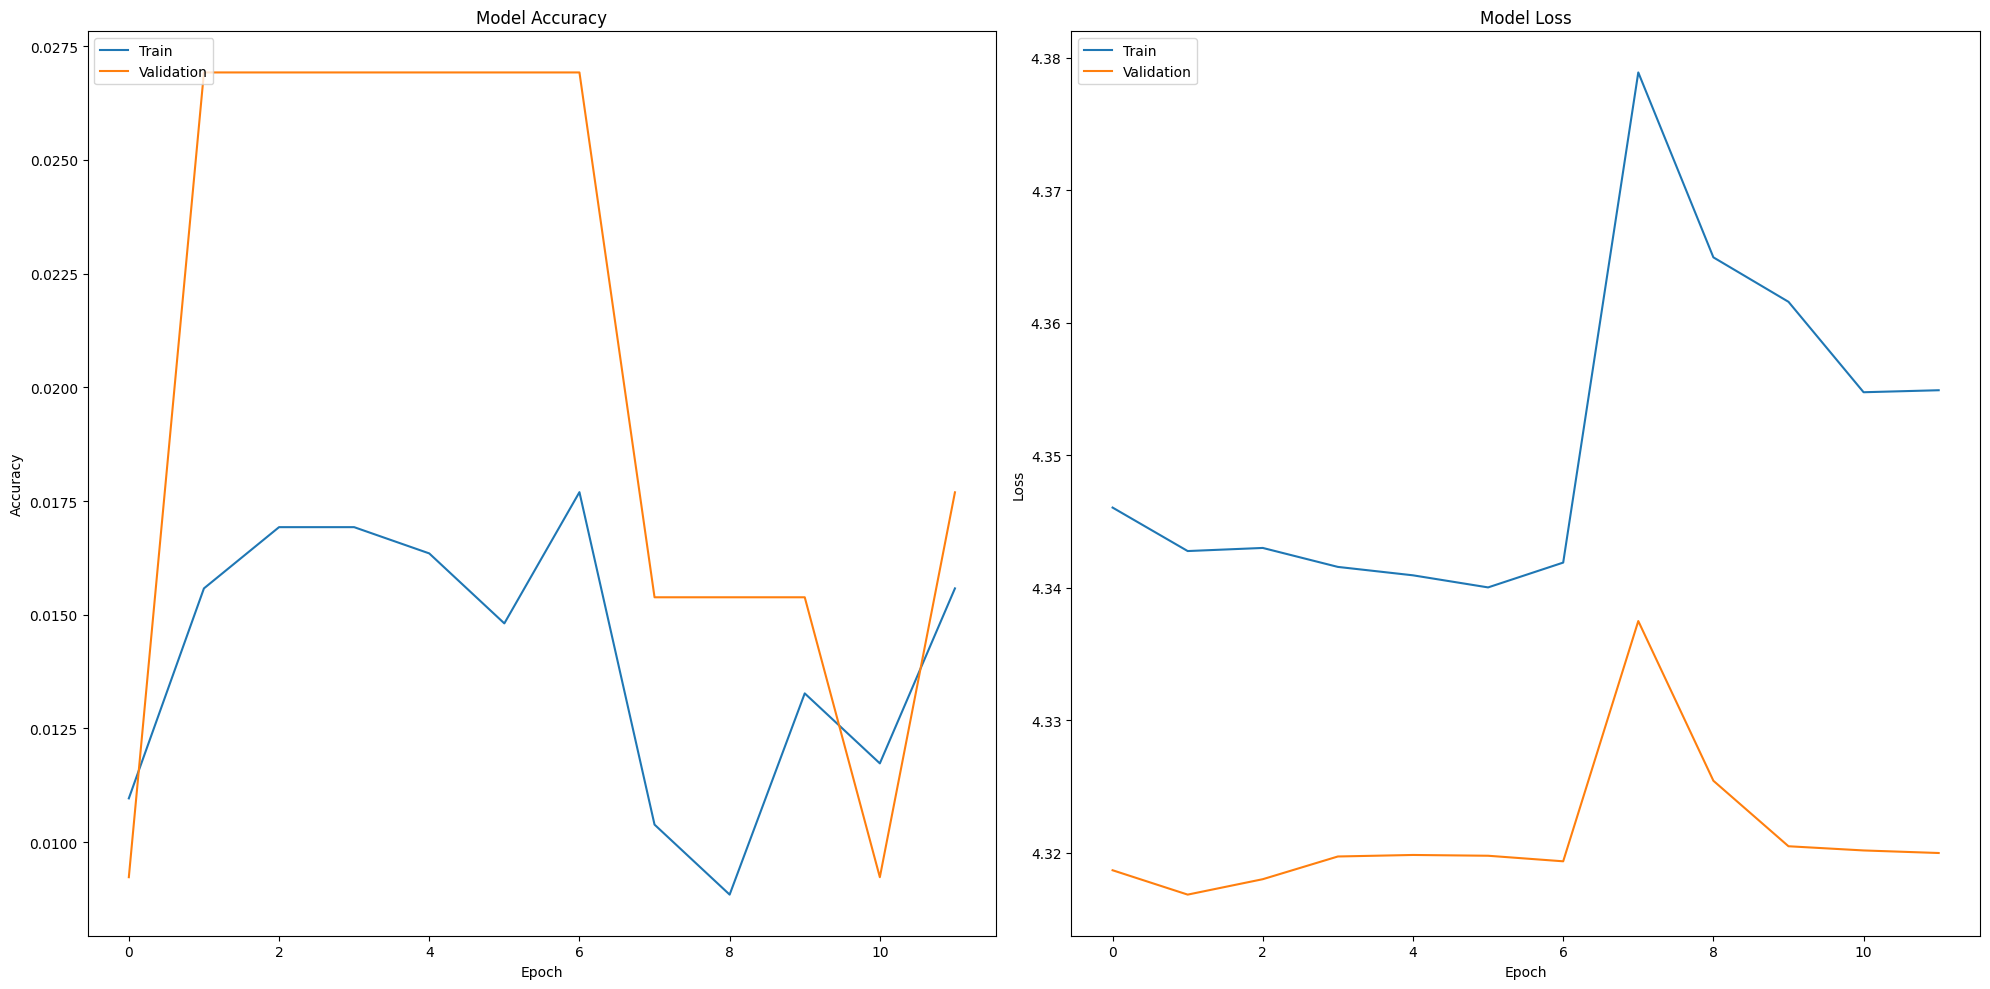

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Pretrained EfficientNetB0 Model (Without Top Layers)
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze Base Model (First Training Phase)
base_model.trainable = False

# Create Model with Custom Fully Connected Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(75, activation='softmax')  # Output Layer (Number of Classes)
])

# Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define class weights for imbalance handling
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Modify based on dataset imbalance

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Train the model (First Phase: Frozen Base Model)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Fine-Tune Model by Unfreezing Last 20 Layers of EfficientNetB0
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Keep earlier layers frozen
    layer.trainable = False

# Recompile for Fine-Tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-Tune the Model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Fine-tuning phase
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Handle Test Data (No Labels)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=image_dir,
    x_col='filename',
    y_col=None,  # No labels available
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No class labels
    shuffle=False
)

# Predict on test images
predictions = model.predict(test_generator)

# Convert softmax probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Create DataFrame with filenames and predicted labels
df_test['predicted_label'] = predicted_classes

# Save predictions to CSV (Optional)
df_test[['filename', 'predicted_label']].to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

# Plot Accuracy and Loss
plt.figure(figsize=(20, 10))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_finetune.history['loss'])
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 63s 358ms/step - accuracy: 0.0203 - loss: 4.4566 - val_accuracy: 0.0677 - val_loss: 4.2126 - learning_rate: 1.0000e-04
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 60s 351ms/step - accuracy: 0.0506 - loss: 4.2561 - val_accuracy: 0.1385 - val_loss: 4.0780 - learning_rate: 1.0000e-04
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 347ms/step - accuracy: 0.1023 - loss: 4.1088 - val_accuracy: 0.2392 - val_loss: 3.9306 - learning_rate: 1.0000e-04
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 342ms/step - accuracy: 0.1524 - loss: 3.9563 - val_accuracy: 0.2415 - val_loss: 3.7718 - learning_rate: 1.0000e-04
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 343ms/step - accuracy: 0.1904 - loss: 3.8222 - val_accuracy: 0.3169 - val_loss: 3.6080 - learning_rate: 1.0000e-04
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 59s 346ms/step - accuracy: 0.2387 - loss: 3.6692 - val_accuracy: 0.3415 - val_loss: 3.4429 - learning_rate: 1.0000e-04
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 343ms/step - 

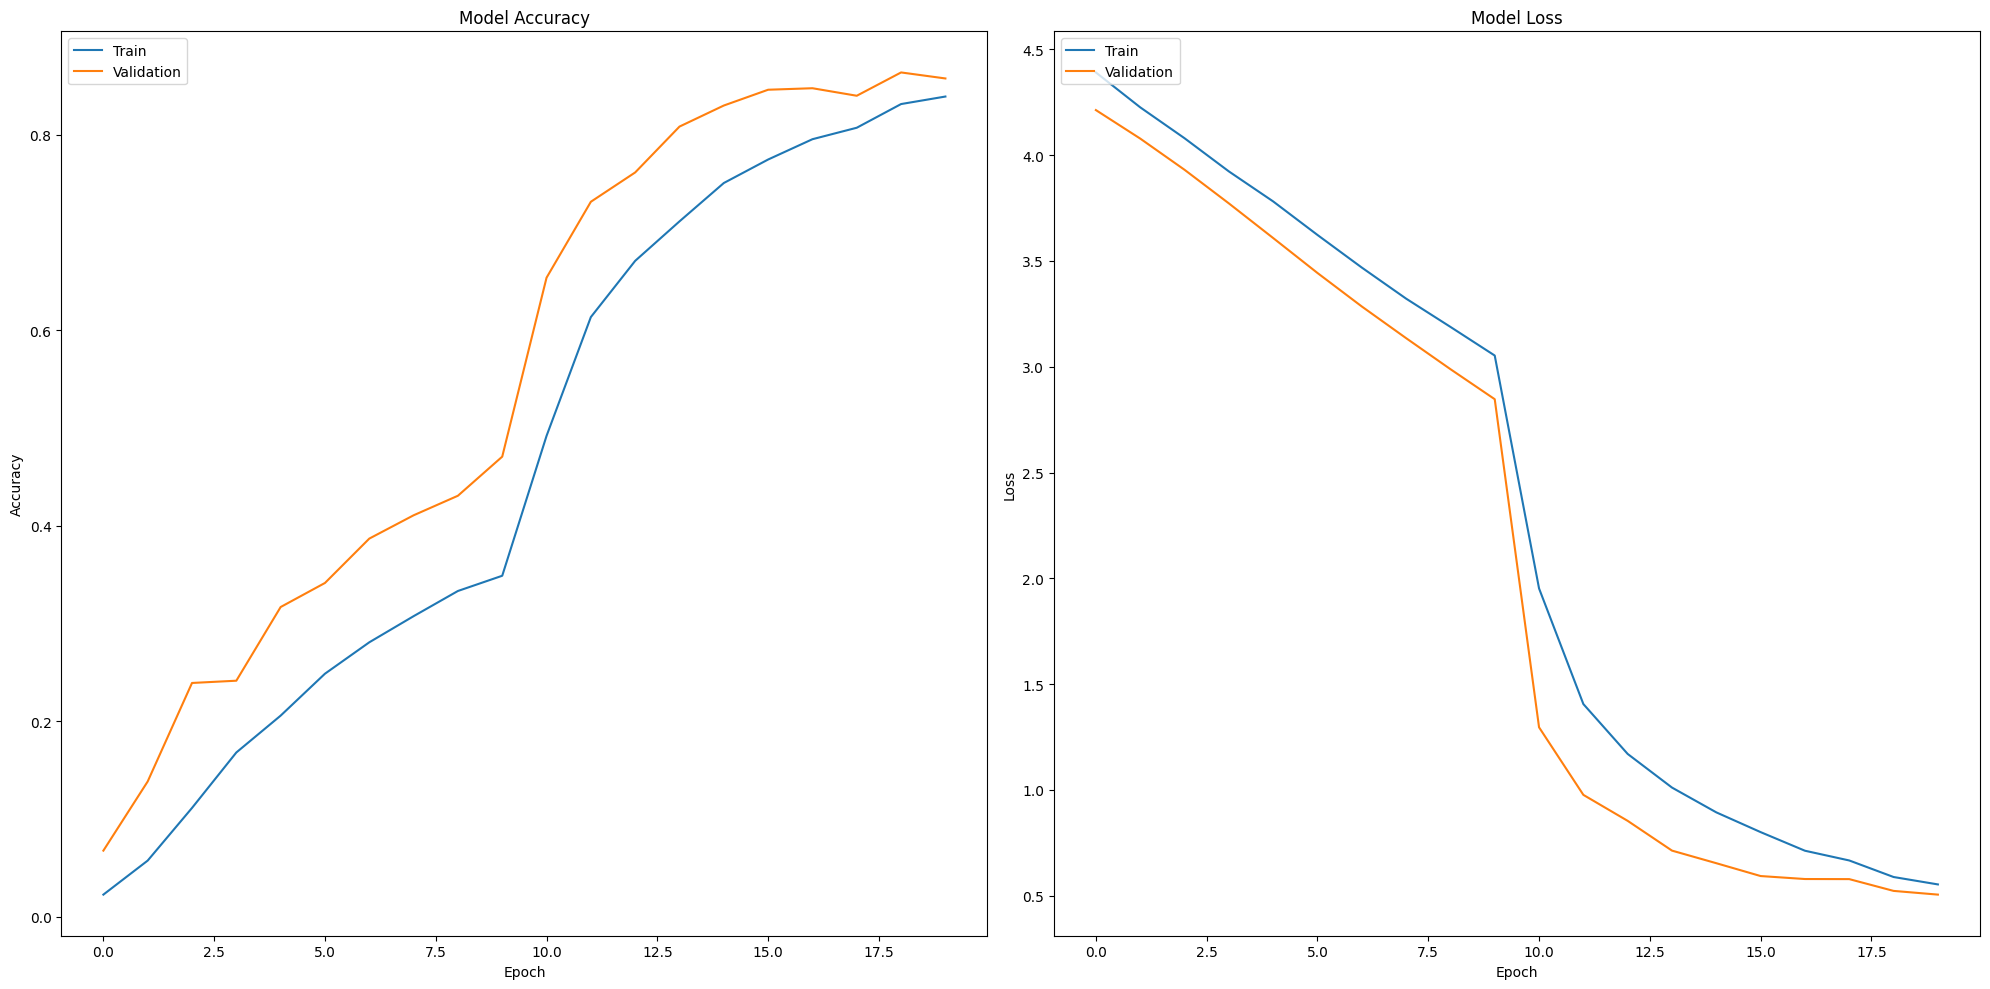

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Pretrained MobileNetV2 Model (Without Top Layers)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze Base Model (First Training Phase)
base_model.trainable = False

# Create Model with Custom Fully Connected Layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(75, activation='softmax')  # Output Layer (Number of Classes)
])

# Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define class weights for imbalance handling
class_weights = {0: 1.0, 1: 1.0, 2: 1.5}  # Modify based on dataset imbalance

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Train the model (First Phase: Frozen Base Model)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Fine-Tune Model by Unfreezing Last 20 Layers of MobileNetV2
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Keep earlier layers frozen
    layer.trainable = False

# Recompile for Fine-Tuning
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-Tune the Model
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,  # Fine-tuning phase
    class_weight=class_weights,
    callbacks=[lr_scheduler, early_stopping]
)

# Handle Test Data (No Labels)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory=image_dir,
    x_col='filename',
    y_col=None,  # No labels available
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  # No class labels
    shuffle=False
)

# Predict on test images
predictions = model.predict(test_generator)

# Convert softmax probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Create DataFrame with filenames and predicted labels
df_test['predicted_label'] = predicted_classes

# Save predictions to CSV (Optional)
df_test[['filename', 'predicted_label']].to_csv("test_predictions.csv", index=False)

print("Predictions saved to test_predictions.csv")

# Plot Accuracy and Loss
plt.figure(figsize=(20, 10))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'] + history_finetune.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_finetune.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'] + history_finetune.history['loss'])
plt.plot(history.history['val_loss'] + history_finetune.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Thank you!!!!

In [12]:
!pip install efficientnet-pytorch


  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=fa0d818d291bab8543e71e40f455cb73cbfb5cd2000de85f9bcde63aacdf8801
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


Epoch 1/10, Loss: 3.9067, Accuracy: 0.0837
Validation Loss: 2.6013, Validation Accuracy: 0.2992
Epoch 2/10, Loss: 2.3260, Accuracy: 0.3695
Validation Loss: 1.5723, Validation Accuracy: 0.5569
Epoch 3/10, Loss: 1.5218, Accuracy: 0.5784
Validation Loss: 0.9146, Validation Accuracy: 0.7223
Epoch 4/10, Loss: 1.2127, Accuracy: 0.6584
Validation Loss: 0.8137, Validation Accuracy: 0.7492
Epoch 5/10, Loss: 1.0357, Accuracy: 0.7080
Validation Loss: 0.6157, Validation Accuracy: 0.8154
Epoch 6/10, Loss: 0.9366, Accuracy: 0.7292
Validation Loss: 0.6301, Validation Accuracy: 0.8031
Epoch 7/10, Loss: 0.8758, Accuracy: 0.7500
Validation Loss: 0.5701, Validation Accuracy: 0.8346
Epoch 8/10, Loss: 0.7895, Accuracy: 0.7750
Validation Loss: 0.5991, Validation Accuracy: 0.8462
Epoch 9/10, Loss: 0.7397, Accuracy: 0.7827
Validation Loss: 0.6696, Validation Accuracy: 0.8038
Epoch 10/10, Loss: 0.7215, Accuracy: 0.7902
Validation Loss: 0.5065, Validation Accuracy: 0.8546
Model saved!


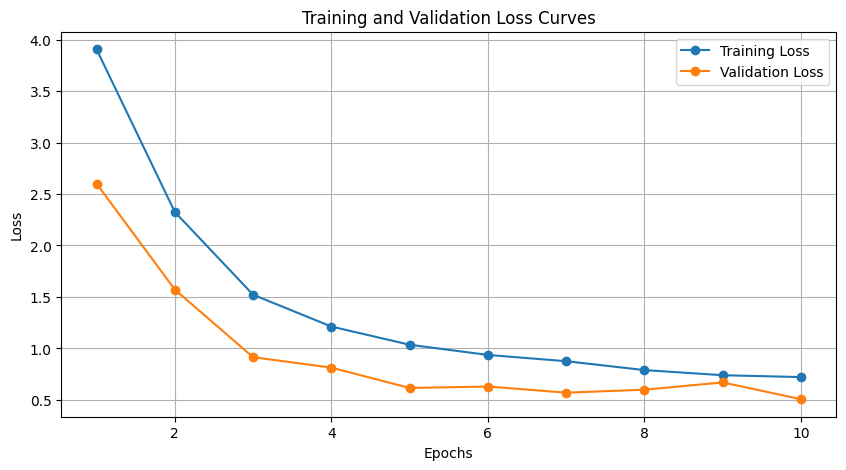

Predictions saved to test_predictions.csv


In [11]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from PIL import Image
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Map class names to integer labels
class_names = df_train['label'].unique()
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create custom dataset class
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, is_test=False):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test  # Flag to indicate if it's test data
        self.class_name_to_label = class_name_to_label

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.image_dir, img_name)
        
        # Load image and convert to PIL Image
        image = plt.imread(img_path)
        image = Image.fromarray(image)  # Convert numpy array to PIL Image

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            # For test dataset, return only the image
            return image
        else:
            class_name = self.dataframe.iloc[idx, 1]
            label = self.class_name_to_label[class_name]  # Get the label as integer
            return image, label

# Create DataLoader for training and validation sets
train_dataset = ButterflyDataset(dataframe=train_data, image_dir=image_dir, transform=train_transforms)
val_dataset = ButterflyDataset(dataframe=val_data, image_dir=image_dir, transform=val_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained VGG16 Model
model = models.vgg16(weights='IMAGENET1K_V1')  # Load weights
# Modify the classifier to match the number of classes (75 butterfly species)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, len(class_names))

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the number of epochs
num_epochs = 10

# Lists to store the loss values for plotting
train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # Append the training loss for this epoch
    train_losses.append(epoch_loss)

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_corrects.double() / val_total
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

    # Append the validation loss for this epoch
    val_losses.append(val_epoch_loss)

# Save the trained model
torch.save(model.state_dict(), "butterfly_vgg16_model.pth")
print("Model saved!")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test dataset
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = ButterflyDataset(dataframe=df_test, image_dir=image_dir, transform=test_transforms, is_test=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Generate predictions
model.eval()
test_predictions = []
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())

# Add predictions to the test dataframe and save
df_test['predicted_label'] = test_predictions
df_test[['filename', 'predicted_label']].to_csv("/kaggle/working/test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 201MB/s]


Epoch 1/10, Loss: 2.9611, Accuracy: 0.3876
Validation Loss: 0.9395, Validation Accuracy: 0.7708
Epoch 2/10, Loss: 0.9280, Accuracy: 0.7728
Validation Loss: 0.4617, Validation Accuracy: 0.8838
Epoch 3/10, Loss: 0.6246, Accuracy: 0.8354
Validation Loss: 0.3573, Validation Accuracy: 0.8854
Epoch 4/10, Loss: 0.4910, Accuracy: 0.8646
Validation Loss: 0.3244, Validation Accuracy: 0.9031
Epoch 5/10, Loss: 0.4208, Accuracy: 0.8800
Validation Loss: 0.3127, Validation Accuracy: 0.9115
Epoch 6/10, Loss: 0.3784, Accuracy: 0.8957
Validation Loss: 0.2547, Validation Accuracy: 0.9200
Epoch 7/10, Loss: 0.3307, Accuracy: 0.9079
Validation Loss: 0.2655, Validation Accuracy: 0.9254
Epoch 8/10, Loss: 0.2995, Accuracy: 0.9127
Validation Loss: 0.2953, Validation Accuracy: 0.9138
Epoch 9/10, Loss: 0.2922, Accuracy: 0.9179
Validation Loss: 0.2694, Validation Accuracy: 0.9231
Epoch 10/10, Loss: 0.2639, Accuracy: 0.9250
Validation Loss: 0.3071, Validation Accuracy: 0.9169
Model saved!


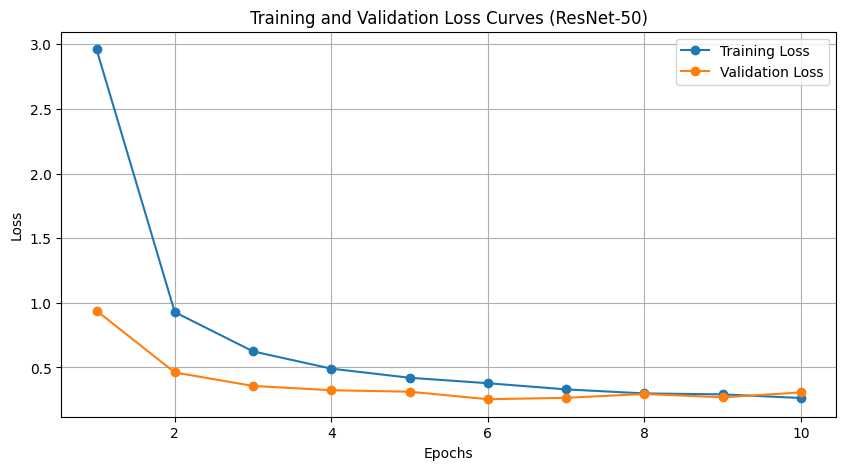

Predictions saved to test_predictions.csv


In [12]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from PIL import Image
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Map class names to integer labels
class_names = df_train['label'].unique()
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create custom dataset class
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, is_test=False):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test  # Flag to indicate if it's test data
        self.class_name_to_label = class_name_to_label

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.image_dir, img_name)
        
        # Load image and convert to PIL Image
        image = plt.imread(img_path)
        image = Image.fromarray(image)  # Convert numpy array to PIL Image

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            # For test dataset, return only the image
            return image
        else:
            class_name = self.dataframe.iloc[idx, 1]
            label = self.class_name_to_label[class_name]  # Get the label as integer
            return image, label

# Create DataLoader for training and validation sets
train_dataset = ButterflyDataset(dataframe=train_data, image_dir=image_dir, transform=train_transforms)
val_dataset = ButterflyDataset(dataframe=val_data, image_dir=image_dir, transform=val_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained ResNet50 Model
model = models.resnet50(weights='IMAGENET1K_V2')  # Load weights for ResNet50
# Modify the classifier to match the number of classes (75 butterfly species)
model.fc = nn.Linear(model.fc.in_features, len(class_names))

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the number of epochs
num_epochs = 10

# Lists to store the loss values for plotting
train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # Append the training loss for this epoch
    train_losses.append(epoch_loss)

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_corrects.double() / val_total
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

    # Append the validation loss for this epoch
    val_losses.append(val_epoch_loss)

# Save the trained model
torch.save(model.state_dict(), "butterfly_resnet50_model.pth")
print("Model saved!")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves (ResNet-50)')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test dataset
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = ButterflyDataset(dataframe=df_test, image_dir=image_dir, transform=test_transforms, is_test=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Generate predictions
model.eval()
test_predictions = []
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())

# Add predictions to the test dataframe and save
df_test['predicted_label'] = test_predictions
df_test[['filename', 'predicted_label']].to_csv("/kaggle/working/test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 197MB/s]


Epoch 1/10, Train Loss: 3.7002
Validation Loss: 2.2550
Epoch 2/10, Train Loss: 1.9130
Validation Loss: 0.9689
Epoch 3/10, Train Loss: 1.0828
Validation Loss: 0.6035
Epoch 4/10, Train Loss: 0.7723
Validation Loss: 0.4647
Epoch 5/10, Train Loss: 0.6373
Validation Loss: 0.3683
Epoch 6/10, Train Loss: 0.5492
Validation Loss: 0.3057
Epoch 7/10, Train Loss: 0.4845
Validation Loss: 0.2853
Epoch 8/10, Train Loss: 0.4356
Validation Loss: 0.2618
Epoch 9/10, Train Loss: 0.4320
Validation Loss: 0.2575
Epoch 10/10, Train Loss: 0.3957
Validation Loss: 0.2559
Model saved!


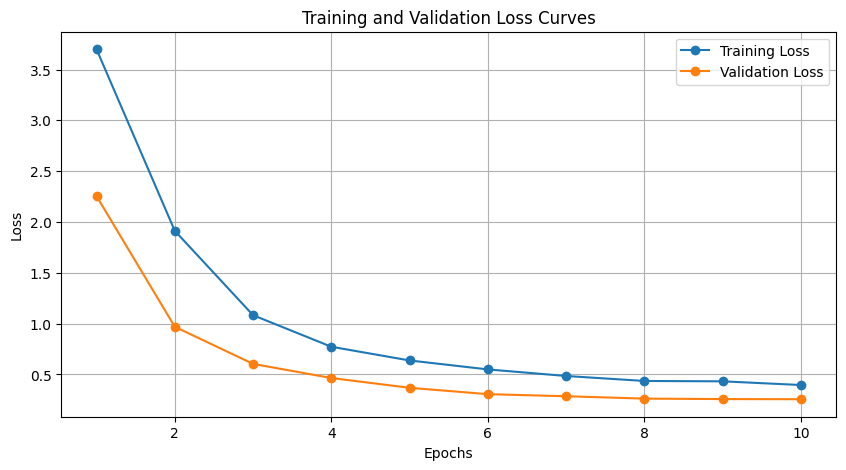

In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from PIL import Image
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Map class names to integer labels
class_names = df_train['label'].unique()
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom Dataset class
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, is_test=False):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test  # Flag to indicate if it's test data
        self.class_name_to_label = class_name_to_label

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.image_dir, img_name)
        
        # Load image and convert to PIL Image
        image = Image.open(img_path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)

        if self.is_test:
            return image
        else:
            class_name = self.dataframe.iloc[idx, 1]
            label = self.class_name_to_label[class_name]
            return image, label

# Create DataLoaders
train_dataset = ButterflyDataset(dataframe=train_data, image_dir=image_dir, transform=train_transforms)
val_dataset = ButterflyDataset(dataframe=val_data, image_dir=image_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained EfficientNet-B0 Model
model = models.efficientnet_b0(weights='IMAGENET1K_V1')
model.classifier[1] = nn.Linear(model.classifier[1].in_features, len(class_names))

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training Loop
num_epochs = 10
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, total = 0.0, 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        total += labels.size(0)
    
    epoch_loss = running_loss / total
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}")
    
    # Validation Loop
    model.eval()
    val_loss, val_total = 0.0, 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            val_total += labels.size(0)
    
    val_epoch_loss = val_loss / val_total
    val_losses.append(val_epoch_loss)
    print(f"Validation Loss: {val_epoch_loss:.4f}")

# Save Model
torch.save(model.state_dict(), "butterfly_efficientnet.pth")
print("Model saved!")

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 3.0457, Accuracy: 0.2502
Validation Loss: 1.4034, Validation Accuracy: 0.6169
Epoch 2/10, Loss: 1.5992, Accuracy: 0.5632
Validation Loss: 0.8082, Validation Accuracy: 0.7569
Epoch 3/10, Loss: 1.2221, Accuracy: 0.6599
Validation Loss: 0.7472, Validation Accuracy: 0.7823
Epoch 4/10, Loss: 0.9875, Accuracy: 0.7207
Validation Loss: 0.6726, Validation Accuracy: 0.8038
Epoch 5/10, Loss: 0.9450, Accuracy: 0.7307
Validation Loss: 0.6341, Validation Accuracy: 0.8146
Epoch 6/10, Loss: 0.8272, Accuracy: 0.7671
Validation Loss: 0.5792, Validation Accuracy: 0.8423
Epoch 7/10, Loss: 0.7445, Accuracy: 0.7880
Validation Loss: 0.6045, Validation Accuracy: 0.8292
Epoch 8/10, Loss: 0.6968, Accuracy: 0.7971
Validation Loss: 0.5001, Validation Accuracy: 0.8685
Epoch 9/10, Loss: 0.6536, Accuracy: 0.8098
Validation Loss: 0.5184, Validation Accuracy: 0.8646
Epoch 10/10, Loss: 0.6550, Accuracy: 0.8148
Validation Loss: 0.5004, Validation Accuracy: 0.8623
Model saved!


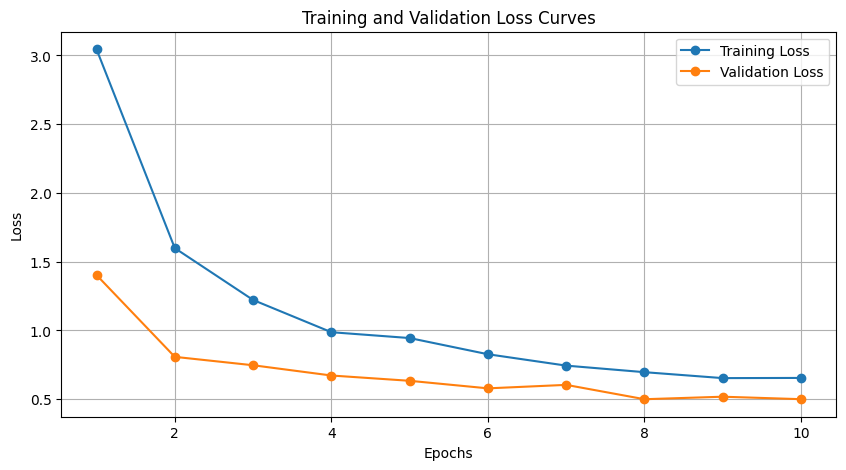

RuntimeError: The size of tensor a (32) must match the size of tensor b (20) at non-singleton dimension 0

In [5]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from PIL import Image
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Map class names to integer labels
class_names = df_train['label'].unique()
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation and preprocessing
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom dataset class with handling for test data
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, is_test=False):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test
        self.class_name_to_label = class_name_to_label

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.image_dir, img_name)

        # Load image and convert to PIL format
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            return image  # Only return image for test dataset, no labels
        else:
            class_name = self.dataframe.iloc[idx, 1]  # Train data has labels
            label = self.class_name_to_label[class_name]
            return image, label

# Create DataLoader for training and validation sets
train_dataset = ButterflyDataset(dataframe=train_data, image_dir=image_dir, transform=train_transforms)
val_dataset = ButterflyDataset(dataframe=val_data, image_dir=image_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained VGG16 Model
model = models.vgg16(pretrained=True)

# Modify the classifier to match the number of classes (75 butterfly species)
num_ftrs = model.classifier[6].in_features
model.classifier[6] = nn.Linear(num_ftrs, len(class_names))

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the number of epochs
num_epochs = 10

# Lists to store the loss values for plotting
train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    train_losses.append(epoch_loss)

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_corrects.double() / val_total
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

    val_losses.append(val_epoch_loss)

# Save the trained model
torch.save(model.state_dict(), "butterfly_vgg16_model.pth")
print("Model saved!")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# **Test Data Processing & Accuracy Calculation**
test_dataset = ButterflyDataset(dataframe=df_test, image_dir=image_dir, transform=val_transforms, is_test=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate the model on the test dataset
model.eval()
test_corrects = 0
test_total = 0

with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_corrects += torch.sum(preds == labels.data)
        test_total += labels.size(0)

# Compute test accuracy
test_accuracy = test_corrects.double() / test_total
print(f"Test Accuracy: {test_accuracy:.4f}")

# **Make Predictions on Test Data & Save**
test_predictions = []
test_filenames = df_test.iloc[:, 0].tolist()

model.eval()
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())

# Save test predictions
df_test['predicted_label'] = test_predictions
df_test[['filename', 'predicted_label']].to_csv("/kaggle/working/test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 236MB/s]


Epoch 1/10, Loss: 2.3164, Accuracy: 0.5120
Validation Loss: 0.7448, Validation Accuracy: 0.8077
Epoch 2/10, Loss: 0.8484, Accuracy: 0.7934
Validation Loss: 0.4324, Validation Accuracy: 0.8715
Epoch 3/10, Loss: 0.6325, Accuracy: 0.8319
Validation Loss: 0.3501, Validation Accuracy: 0.9046
Epoch 4/10, Loss: 0.5560, Accuracy: 0.8525
Validation Loss: 0.3404, Validation Accuracy: 0.9038
Epoch 5/10, Loss: 0.4859, Accuracy: 0.8704
Validation Loss: 0.3019, Validation Accuracy: 0.9131
Epoch 6/10, Loss: 0.4213, Accuracy: 0.8823
Validation Loss: 0.2679, Validation Accuracy: 0.9223
Epoch 7/10, Loss: 0.3925, Accuracy: 0.8900
Validation Loss: 0.3076, Validation Accuracy: 0.9131
Epoch 8/10, Loss: 0.3967, Accuracy: 0.8898
Validation Loss: 0.2913, Validation Accuracy: 0.9154
Epoch 9/10, Loss: 0.3560, Accuracy: 0.8994
Validation Loss: 0.2905, Validation Accuracy: 0.9154
Epoch 10/10, Loss: 0.3359, Accuracy: 0.9058
Validation Loss: 0.2999, Validation Accuracy: 0.9138
Model saved!


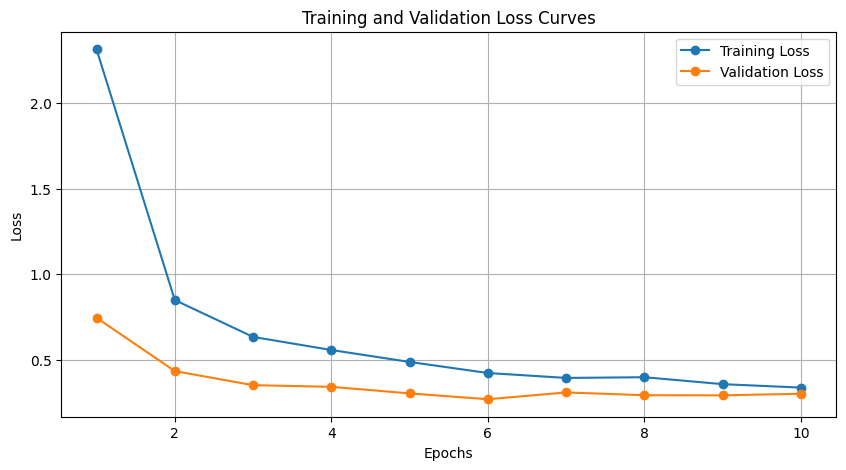

RuntimeError: The size of tensor a (32) must match the size of tensor b (20) at non-singleton dimension 0

In [6]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from PIL import Image
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Map class names to integer labels
class_names = df_train['label'].unique()
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation and preprocessing
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom dataset class with handling for test data
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, is_test=False):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test
        self.class_name_to_label = class_name_to_label

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.image_dir, img_name)

        # Load image and convert to PIL format
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            return image  # Only return image for test dataset, no labels
        else:
            class_name = self.dataframe.iloc[idx, 1]  # Train data has labels
            label = self.class_name_to_label[class_name]
            return image, label

# Create DataLoader for training and validation sets
train_dataset = ButterflyDataset(dataframe=train_data, image_dir=image_dir, transform=train_transforms)
val_dataset = ButterflyDataset(dataframe=val_data, image_dir=image_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained ResNet-50 Model
model = models.resnet50(pretrained=True)

# Modify the classifier to match the number of classes (75 butterfly species)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the number of epochs
num_epochs = 10

# Lists to store the loss values for plotting
train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    train_losses.append(epoch_loss)

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_corrects.double() / val_total
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

    val_losses.append(val_epoch_loss)

# Save the trained model
torch.save(model.state_dict(), "butterfly_resnet50_model.pth")
print("Model saved!")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# **Test Data Processing & Accuracy Calculation**
test_dataset = ButterflyDataset(dataframe=df_test, image_dir=image_dir, transform=val_transforms, is_test=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate the model on the test dataset
model.eval()
test_corrects = 0
test_total = 0

with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_corrects += torch.sum(preds == labels.data)
        test_total += labels.size(0)

# Compute test accuracy
test_accuracy = test_corrects.double() / test_total
print(f"Test Accuracy: {test_accuracy:.4f}")

# **Make Predictions on Test Data & Save**
test_predictions = []
test_filenames = df_test.iloc[:, 0].tolist()

model.eval()
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())

# Save test predictions
df_test['predicted_label'] = test_predictions
df_test[['filename', 'predicted_label']].to_csv("/kaggle/working/test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 3.7126, Accuracy: 0.2583
Validation Loss: 2.3030, Validation Accuracy: 0.5854
Epoch 2/10, Loss: 1.9408, Accuracy: 0.6301
Validation Loss: 1.0132, Validation Accuracy: 0.7962
Epoch 3/10, Loss: 1.0969, Accuracy: 0.7630
Validation Loss: 0.6157, Validation Accuracy: 0.8508
Epoch 4/10, Loss: 0.7896, Accuracy: 0.8200
Validation Loss: 0.4488, Validation Accuracy: 0.8769
Epoch 5/10, Loss: 0.6280, Accuracy: 0.8444
Validation Loss: 0.3523, Validation Accuracy: 0.9092
Epoch 6/10, Loss: 0.5302, Accuracy: 0.8661
Validation Loss: 0.3210, Validation Accuracy: 0.9115
Epoch 7/10, Loss: 0.4748, Accuracy: 0.8771
Validation Loss: 0.2776, Validation Accuracy: 0.9346
Epoch 8/10, Loss: 0.4239, Accuracy: 0.8890
Validation Loss: 0.2673, Validation Accuracy: 0.9238
Epoch 9/10, Loss: 0.3888, Accuracy: 0.8950
Validation Loss: 0.2652, Validation Accuracy: 0.9308
Epoch 10/10, Loss: 0.3559, Accuracy: 0.9038
Validation Loss: 0.2442, Validation Accuracy: 0.9369
Model saved!


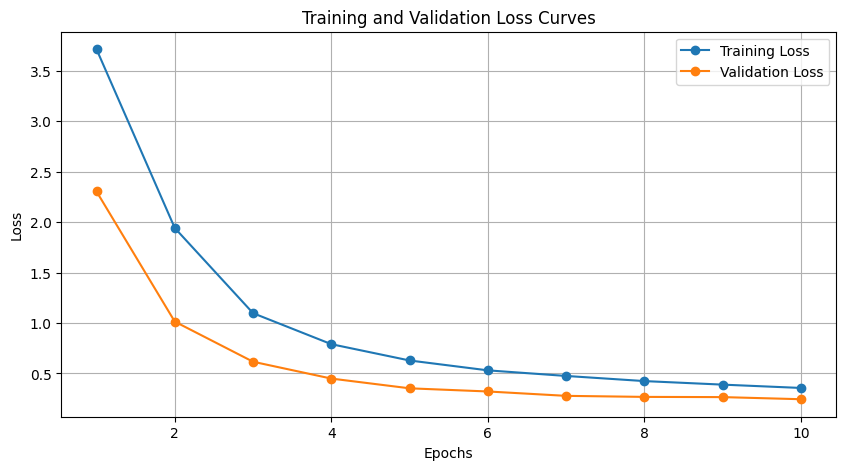

RuntimeError: The size of tensor a (32) must match the size of tensor b (20) at non-singleton dimension 0

In [7]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from PIL import Image
import numpy as np

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Map class names to integer labels
class_names = df_train['label'].unique()
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation and preprocessing
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom dataset class with handling for test data
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, is_test=False):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test
        self.class_name_to_label = class_name_to_label

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.image_dir, img_name)

        # Load image and convert to PIL format
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            return image  # Only return image for test dataset, no labels
        else:
            class_name = self.dataframe.iloc[idx, 1]  # Train data has labels
            label = self.class_name_to_label[class_name]
            return image, label

# Create DataLoader for training and validation sets
train_dataset = ButterflyDataset(dataframe=train_data, image_dir=image_dir, transform=train_transforms)
val_dataset = ButterflyDataset(dataframe=val_data, image_dir=image_dir, transform=val_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained EfficientNetB0 Model
model = models.efficientnet_b0(pretrained=True)

# Modify the classifier to match the number of classes (75 butterfly species)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, len(class_names))

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the number of epochs
num_epochs = 10

# Lists to store the loss values for plotting
train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    train_losses.append(epoch_loss)

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_corrects.double() / val_total
    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")

    val_losses.append(val_epoch_loss)

# Save the trained model
torch.save(model.state_dict(), "butterfly_efficientnet_b0_model.pth")
print("Model saved!")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# **Test Data Processing & Accuracy Calculation**
test_dataset = ButterflyDataset(dataframe=df_test, image_dir=image_dir, transform=val_transforms, is_test=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate the model on the test dataset
model.eval()
test_corrects = 0
test_total = 0

with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_corrects += torch.sum(preds == labels.data)
        test_total += labels.size(0)

# Compute test accuracy
test_accuracy = test_corrects.double() / test_total
print(f"Test Accuracy: {test_accuracy:.4f}")

# **Make Predictions on Test Data & Save**
test_predictions = []
test_filenames = df_test.iloc[:, 0].tolist()

model.eval()
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())

# Save test predictions
df_test['predicted_label'] = test_predictions
df_test[['filename', 'predicted_label']].to_csv("/kaggle/working/test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 204MB/s] 


Epoch 1/10, Loss: 2.9928, Accuracy: 0.2545
Train Precision: 0.2569, Train Recall: 0.2545, Train F1: 0.2485


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Loss: 1.3910, Validation Accuracy: 0.6008
Validation Precision: 0.6795, Validation Recall: 0.6008, Validation F1: 0.5890
Epoch 2/10, Loss: 1.5979, Accuracy: 0.5528
Train Precision: 0.5528, Train Recall: 0.5528, Train F1: 0.5508


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Loss: 0.7585, Validation Accuracy: 0.7669
Validation Precision: 0.7839, Validation Recall: 0.7669, Validation F1: 0.7506
Epoch 3/10, Loss: 1.2268, Accuracy: 0.6657
Train Precision: 0.6685, Train Recall: 0.6657, Train F1: 0.6657
Validation Loss: 0.9186, Validation Accuracy: 0.7423
Validation Precision: 0.7846, Validation Recall: 0.7423, Validation F1: 0.7381
Epoch 4/10, Loss: 1.0488, Accuracy: 0.7078
Train Precision: 0.7105, Train Recall: 0.7078, Train F1: 0.7075
Validation Loss: 0.6008, Validation Accuracy: 0.8300
Validation Precision: 0.8501, Validation Recall: 0.8300, Validation F1: 0.8224
Epoch 5/10, Loss: 0.9340, Accuracy: 0.7380
Train Precision: 0.7390, Train Recall: 0.7380, Train F1: 0.7373


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Loss: 0.5898, Validation Accuracy: 0.8292
Validation Precision: 0.8478, Validation Recall: 0.8292, Validation F1: 0.8190
Epoch 6/10, Loss: 0.8315, Accuracy: 0.7590
Train Precision: 0.7617, Train Recall: 0.7590, Train F1: 0.7593
Validation Loss: 0.5904, Validation Accuracy: 0.8346
Validation Precision: 0.8639, Validation Recall: 0.8346, Validation F1: 0.8345
Epoch 7/10, Loss: 0.7937, Accuracy: 0.7715
Train Precision: 0.7737, Train Recall: 0.7715, Train F1: 0.7718
Validation Loss: 0.5657, Validation Accuracy: 0.8523
Validation Precision: 0.8694, Validation Recall: 0.8523, Validation F1: 0.8503
Epoch 8/10, Loss: 0.7235, Accuracy: 0.7973
Train Precision: 0.7993, Train Recall: 0.7973, Train F1: 0.7972
Validation Loss: 0.4943, Validation Accuracy: 0.8631
Validation Precision: 0.8788, Validation Recall: 0.8631, Validation F1: 0.8567
Epoch 9/10, Loss: 0.6696, Accuracy: 0.8136
Train Precision: 0.8158, Train Recall: 0.8136, Train F1: 0.8137
Validation Loss: 0.4290, Validation Accuracy

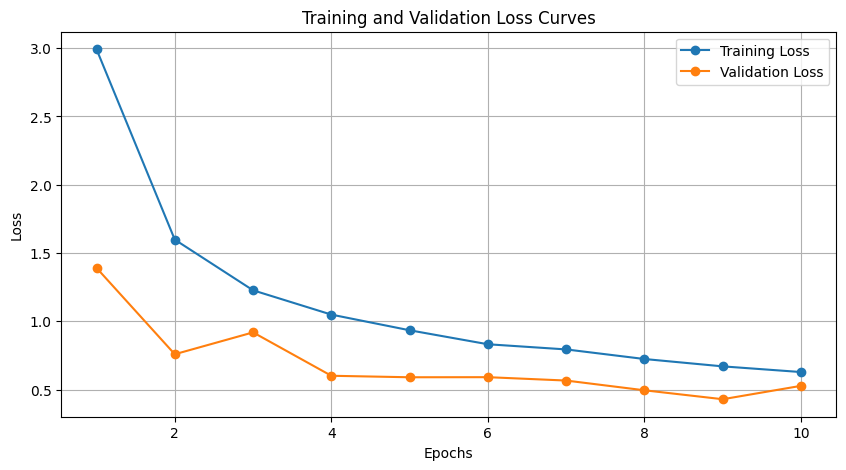

Predictions saved to test_predictions.csv


In [1]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from PIL import Image
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Map class names to integer labels
class_names = df_train['label'].unique()
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create custom dataset class
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, is_test=False):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test  # Flag to indicate if it's test data
        self.class_name_to_label = class_name_to_label

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.image_dir, img_name)
        
        # Load image and convert to PIL Image
        image = plt.imread(img_path)
        image = Image.fromarray(image)  # Convert numpy array to PIL Image

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            # For test dataset, return only the image
            return image
        else:
            class_name = self.dataframe.iloc[idx, 1]
            label = self.class_name_to_label[class_name]  # Get the label as integer
            return image, label

# Create DataLoader for training and validation sets
train_dataset = ButterflyDataset(dataframe=train_data, image_dir=image_dir, transform=train_transforms)
val_dataset = ButterflyDataset(dataframe=val_data, image_dir=image_dir, transform=val_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained VGG16 Model
model = models.vgg16(weights='IMAGENET1K_V1')  # Load weights
# Modify the classifier to match the number of classes (75 butterfly species)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, len(class_names))

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the number of epochs
num_epochs = 10

# Lists to store the loss values for plotting
train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0
    all_preds = []
    all_labels = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total

    # Calculate Precision, Recall, and F1 Score
    train_precision = precision_score(all_labels, all_preds, average='weighted')
    train_recall = recall_score(all_labels, all_preds, average='weighted')
    train_f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
    print(f"Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")

    # Append the training loss for this epoch
    train_losses.append(epoch_loss)

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    val_total = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_corrects.double() / val_total

    # Calculate Precision, Recall, and F1 Score for Validation
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_recall = recall_score(val_labels, val_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')

    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")
    print(f"Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}, Validation F1: {val_f1:.4f}")

    # Append the validation loss for this epoch
    val_losses.append(val_epoch_loss)

# Save the trained model
torch.save(model.state_dict(), "butterfly_vgg16_model.pth")
print("Model saved!")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test dataset
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = ButterflyDataset(dataframe=df_test, image_dir=image_dir, transform=test_transforms, is_test=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Generate predictions
model.eval()
test_predictions = []
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())

# Add predictions to the test dataframe and save
df_test['predicted_label'] = test_predictions
df_test[['filename', 'predicted_label']].to_csv("/kaggle/working/test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 187MB/s]


Epoch 1/10, Loss: 2.3182, Accuracy: 0.5045
Train Precision: 0.5590, Train Recall: 0.5045, Train F1: 0.5072


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Loss: 0.7240, Validation Accuracy: 0.8154
Validation Precision: 0.8311, Validation Recall: 0.8154, Validation F1: 0.8046
Epoch 2/10, Loss: 0.8783, Accuracy: 0.7882
Train Precision: 0.7891, Train Recall: 0.7882, Train F1: 0.7869
Validation Loss: 0.4683, Validation Accuracy: 0.8654
Validation Precision: 0.8820, Validation Recall: 0.8654, Validation F1: 0.8613
Epoch 3/10, Loss: 0.6809, Accuracy: 0.8229
Train Precision: 0.8238, Train Recall: 0.8229, Train F1: 0.8218
Validation Loss: 0.3581, Validation Accuracy: 0.8938
Validation Precision: 0.9063, Validation Recall: 0.8938, Validation F1: 0.8892
Epoch 4/10, Loss: 0.5910, Accuracy: 0.8390
Train Precision: 0.8403, Train Recall: 0.8390, Train F1: 0.8388
Validation Loss: 0.3298, Validation Accuracy: 0.8962
Validation Precision: 0.9105, Validation Recall: 0.8962, Validation F1: 0.8921
Epoch 5/10, Loss: 0.4989, Accuracy: 0.8677
Train Precision: 0.8691, Train Recall: 0.8677, Train F1: 0.8678
Validation Loss: 0.3258, Validation Accuracy

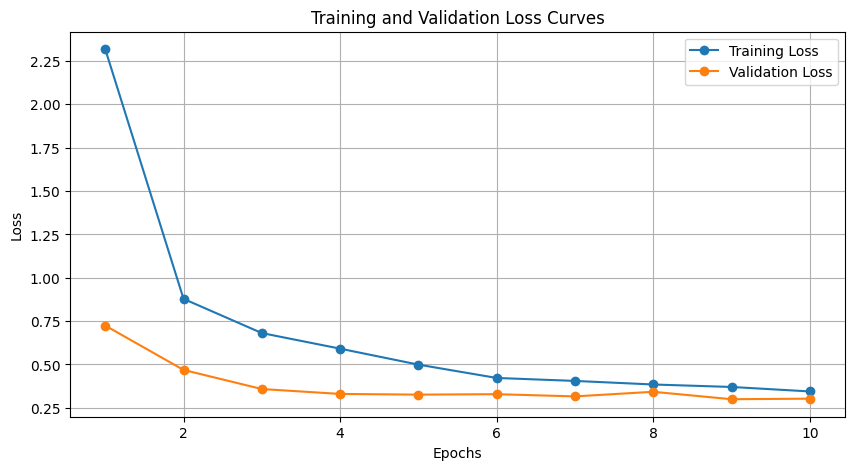

Predictions saved to test_predictions.csv


In [2]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from PIL import Image
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Map class names to integer labels
class_names = df_train['label'].unique()
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create custom dataset class
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, is_test=False):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test  # Flag to indicate if it's test data
        self.class_name_to_label = class_name_to_label

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.image_dir, img_name)
        
        # Load image and convert to PIL Image
        image = plt.imread(img_path)
        image = Image.fromarray(image)  # Convert numpy array to PIL Image

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            # For test dataset, return only the image
            return image
        else:
            class_name = self.dataframe.iloc[idx, 1]
            label = self.class_name_to_label[class_name]  # Get the label as integer
            return image, label

# Create DataLoader for training and validation sets
train_dataset = ButterflyDataset(dataframe=train_data, image_dir=image_dir, transform=train_transforms)
val_dataset = ButterflyDataset(dataframe=val_data, image_dir=image_dir, transform=val_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained ResNet50 Model
model = models.resnet50(weights='IMAGENET1K_V1')  # Load weights
# Modify the classifier to match the number of classes (75 butterfly species)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the number of epochs
num_epochs = 10

# Lists to store the loss values for plotting
train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0
    all_preds = []
    all_labels = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total

    # Calculate Precision, Recall, and F1 Score
    train_precision = precision_score(all_labels, all_preds, average='weighted')
    train_recall = recall_score(all_labels, all_preds, average='weighted')
    train_f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
    print(f"Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")

    # Append the training loss for this epoch
    train_losses.append(epoch_loss)

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    val_total = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_corrects.double() / val_total

    # Calculate Precision, Recall, and F1 Score for Validation
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_recall = recall_score(val_labels, val_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')

    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")
    print(f"Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}, Validation F1: {val_f1:.4f}")

    # Append the validation loss for this epoch
    val_losses.append(val_epoch_loss)

# Save the trained model
torch.save(model.state_dict(), "butterfly_resnet50_model.pth")
print("Model saved!")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test dataset
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = ButterflyDataset(dataframe=df_test, image_dir=image_dir, transform=test_transforms, is_test=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Generate predictions
model.eval()
test_predictions = []
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())

# Add predictions to the test dataframe and save
df_test['predicted_label'] = test_predictions
df_test[['filename', 'predicted_label']].to_csv("/kaggle/working/test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 184MB/s]


Epoch 1/10, Loss: 3.7212, Accuracy: 0.2677
Train Precision: 0.3023, Train Recall: 0.2677, Train F1: 0.2565


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Loss: 2.3037, Validation Accuracy: 0.6269
Validation Precision: 0.6717, Validation Recall: 0.6269, Validation F1: 0.5976
Epoch 2/10, Loss: 1.9019, Accuracy: 0.6453
Train Precision: 0.6635, Train Recall: 0.6453, Train F1: 0.6289
Validation Loss: 1.0087, Validation Accuracy: 0.7954
Validation Precision: 0.8283, Validation Recall: 0.7954, Validation F1: 0.7824
Epoch 3/10, Loss: 1.0946, Accuracy: 0.7582
Train Precision: 0.7586, Train Recall: 0.7582, Train F1: 0.7523
Validation Loss: 0.6022, Validation Accuracy: 0.8562
Validation Precision: 0.8732, Validation Recall: 0.8562, Validation F1: 0.8499
Epoch 4/10, Loss: 0.8088, Accuracy: 0.8000
Train Precision: 0.8003, Train Recall: 0.8000, Train F1: 0.7975
Validation Loss: 0.4532, Validation Accuracy: 0.8900
Validation Precision: 0.9028, Validation Recall: 0.8900, Validation F1: 0.8866
Epoch 5/10, Loss: 0.6605, Accuracy: 0.8317
Train Precision: 0.8321, Train Recall: 0.8317, Train F1: 0.8307
Validation Loss: 0.3849, Validation Accuracy

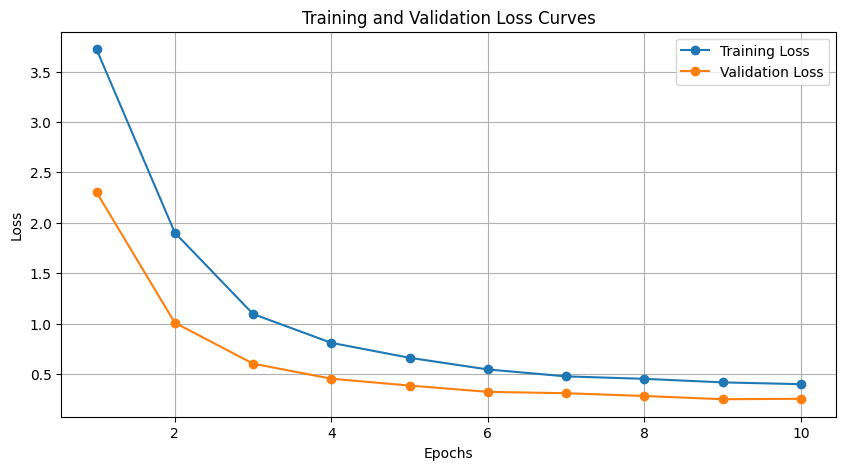

Predictions saved to test_predictions.csv


In [3]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import transforms, models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from PIL import Image
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset CSV files
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")

# Map class names to integer labels
class_names = df_train['label'].unique()
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

# Split training data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Define image directory path
image_dir = "/kaggle/input/butterfly-image-classification/train"

# Data augmentation for training, rescaling for validation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(40),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create custom dataset class
class ButterflyDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None, is_test=False):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform
        self.is_test = is_test  # Flag to indicate if it's test data
        self.class_name_to_label = class_name_to_label

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx, 0]
        img_path = os.path.join(self.image_dir, img_name)
        
        # Load image and convert to PIL Image
        image = plt.imread(img_path)
        image = Image.fromarray(image)  # Convert numpy array to PIL Image

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            # For test dataset, return only the image
            return image
        else:
            class_name = self.dataframe.iloc[idx, 1]
            label = self.class_name_to_label[class_name]  # Get the label as integer
            return image, label

# Create DataLoader for training and validation sets
train_dataset = ButterflyDataset(dataframe=train_data, image_dir=image_dir, transform=train_transforms)
val_dataset = ButterflyDataset(dataframe=val_data, image_dir=image_dir, transform=val_transforms)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained EfficientNetB0 Model
model = models.efficientnet_b0(weights='IMAGENET1K_V1')  # Load weights
# Modify the classifier to match the number of classes (75 butterfly species)
num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_ftrs, len(class_names))

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define the number of epochs
num_epochs = 10

# Lists to store the loss values for plotting
train_losses = []
val_losses = []

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0
    all_preds = []
    all_labels = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total

    # Calculate Precision, Recall, and F1 Score
    train_precision = precision_score(all_labels, all_preds, average='weighted')
    train_recall = recall_score(all_labels, all_preds, average='weighted')
    train_f1 = f1_score(all_labels, all_preds, average='weighted')

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
    print(f"Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")

    # Append the training loss for this epoch
    train_losses.append(epoch_loss)

    # Validation Loop
    model.eval()
    val_loss = 0.0
    val_corrects = 0
    val_total = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_epoch_loss = val_loss / val_total
    val_epoch_acc = val_corrects.double() / val_total

    # Calculate Precision, Recall, and F1 Score for Validation
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_recall = recall_score(val_labels, val_preds, average='weighted')
    val_f1 = f1_score(val_labels, val_preds, average='weighted')

    print(f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_acc:.4f}")
    print(f"Validation Precision: {val_precision:.4f}, Validation Recall: {val_recall:.4f}, Validation F1: {val_f1:.4f}")

    # Append the validation loss for this epoch
    val_losses.append(val_epoch_loss)

# Save the trained model
torch.save(model.state_dict(), "butterfly_efficientnetb0_model.pth")
print("Model saved!")

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.grid(True)
plt.show()

# Predict on the test dataset
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_dataset = ButterflyDataset(dataframe=df_test, image_dir=image_dir, transform=test_transforms, is_test=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Generate predictions
model.eval()
test_predictions = []
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.cpu().numpy())

# Add predictions to the test dataframe and save
df_test['predicted_label'] = test_predictions
df_test[['filename', 'predicted_label']].to_csv("/kaggle/working/test_predictions.csv", index=False)
print("Predictions saved to test_predictions.csv")
